This notebook creates thumbnails to visualize in an interactive plotting using the [Embedding Projector](https://projector.tensorflow.org/).

The goal is to create a sprite image like this one:

![](https://www.tensorflow.org/versions/r1.1/images/mnist_10k_sprite.png)

The approach is as follows:

    * read each line: reshape into a 2D array
    * subsample the array
    * set the small block of the sprite image equal to the corresponding array

In [10]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
specfile = open('../data/spectrogram.csv')

In [4]:
# spec_dim
spec_dim = (513, 314)

In [5]:
nofLines = 625
thumbnails = []

l = 1
for line in specfile:
    res = line.split(',') 
    #rows.append(np.array(res).astype('float')[1:])
    thumbnail = np.log(np.array(res).astype('float')[1:]).reshape(spec_dim)#[::4,::4]
    thumbnails.append(thumbnail)
    l = l + 1
    if l>nofLines:
        break   

/home/ubuntu/anaconda/envs/hydrophone/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [6]:
print(len(thumbnails))
thumbnails[0][199:,:].shape
#513*314
# why less int the last row, makes sense coz of sliding

625


(314, 314)

In [7]:
thumbnails_small = []
for t in thumbnails:
    thumbnails_small.append(t[199:,:])
    

In [8]:
specfile.close()

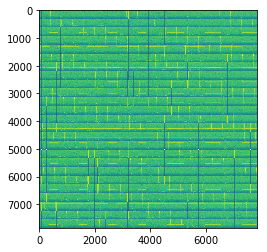

In [14]:
strip = np.hstack(tuple(thumbnails_small))
strip = strip.T.reshape((-1,25*314)).T
plt.imshow(strip)

In [28]:
strip = strip.reshape((25*314,-1))
strip.shape

(7850, 7850)

In [29]:
import skimage

In [39]:
len(np.isinf(im))

7850

In [15]:
from numpy import inf
strip[strip == -inf] = 0
strip.max()
strip.min()

-33.43902276647305

In [16]:
import skimage.io as io
io.imsave('spec_stripe.png', (np.round(255*(strip-strip.min())/(strip.max() - strip.min()))).astype('int'))


# another option: make the thumbnails square images and then stitch them

/home/ubuntu/anaconda/envs/hydrophone/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: spec_stripe.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [51]:
strip = np.hstack(tuple((strip, np.ones((513,))))).reshape((7850,7850))
                

ValueError: all the input arrays must have same number of dimensions

In [17]:
from skimage.io import imread

In [18]:
im = imread('spec_stripe.png')

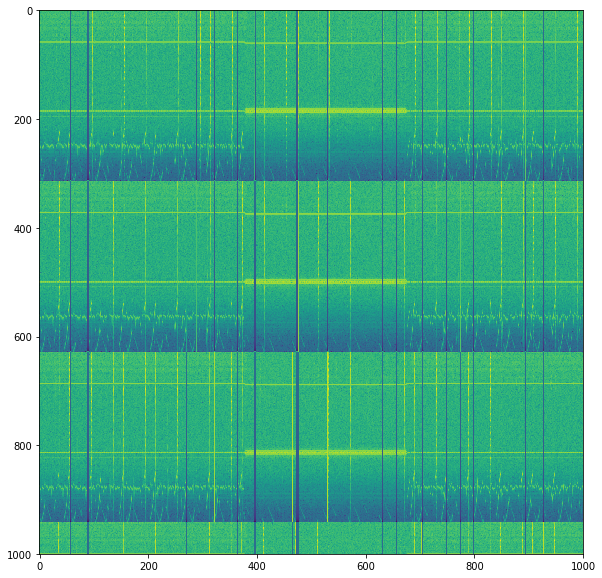

In [20]:

plt.figure(figsize = (10,10))
plt.imshow(im[:1000,:1000])

In [1]:
im[:10,:10]

NameError: name 'im' is not defined

In [ ]:
np.log(X[i,:].reshape(spec_dim)),zoom = 0.05, cmap='plasma'),

In [32]:
# lets not downsample

N = int(np.ceil(np.sqrt(513*314*1441)))

In [33]:
# or maybe they base it on the number of points

In [34]:
# pad with zeros



In [35]:
sprite_image = np.ones((N,N))

In [36]:
N/314

48.52229299363057

In [53]:
50*314

15700

In [42]:
N/513

29.69980506822612

In [52]:
29*513

14877

In [54]:
29*50

1450

In [56]:
im_per_row = 50
im_per_col = 29

In [22]:
ls -lh

total 935M
-rw-rw-r-- 1 ubuntu ubuntu  16K May  8 23:15 create_thumbnails.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 282K Feb 23 21:31 IRIS-OOI-LF-Hydrophone.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 5.2M Mar  1 11:22 johnson_aidan_mseed.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  800 Feb 24 01:57 merged_hydrophone.hdf5
-rw-rw-r-- 1 ubuntu ubuntu 928M Feb 27 23:08 merged_hydrophone_new.mseed
-rw-rw-r-- 1 ubuntu ubuntu 7.9K Mar  1 11:22 OOI_Hydrophone_BB.ipynb
-rw-rw-r-- 1 ubuntu ubuntu  40K Feb 28 02:19 OOI_mseed_merge.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 142K Feb 28 03:38 OOImseedToWave.ipynb
-rw-rw-r-- 1 ubuntu ubuntu 117K May  8 23:00 spec_stripe.png
-rw-rw-r-- 1 ubuntu ubuntu 790K Apr 13 19:36 spectrogram-store-cluster.ipynb


In [23]:
cd ..

/home/ubuntu/cahw2018_hydrophone


In [24]:
ls

data/  notebooks/  programs/  README.md


In [25]:
cd data

/home/ubuntu/cahw2018_hydrophone/data


In [26]:
ls

Galton.tsv               OO-HYVM2--YDH-2017-08-21T00_02_42.437000.mseed
hydrophone.mseed         spectrogram.csv
hydrophone.tsv           spectrogram.tsv
merged_hydrophone.mseed  test.tsv
